# Kütüphaneleri import etmek

In [18]:
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
time_stamp = pd.Timestamp(datetime(2023,12,7))

In [3]:
time_stamp.year

2023

In [4]:
period = pd.Period('2023-01')
period

Period('2023-01', 'M')

In [5]:
period.asfreq('D')

Period('2023-01-31', 'D')

In [6]:
period.to_timestamp().to_period('M') + 3

Period('2023-04', 'M')

In [7]:
index = pd.date_range(start='2022-1-1', periods= 12 , freq= 'M')
index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

### Veri Yükleme

In [13]:
google = pd.read_csv('../../Datasets/google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [14]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [15]:
google.Date = pd.to_datetime(google.Date)
google.set_index('Date',inplace = True)

In [16]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


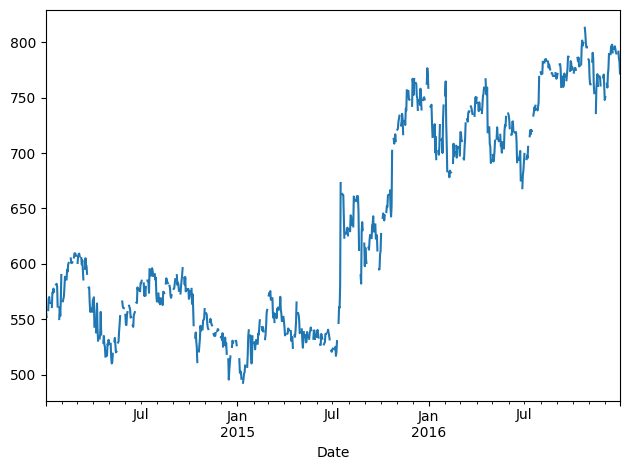

In [21]:
google.Close.plot()
plt.tight_layout()
plt.show()

In [22]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [23]:
google.loc['2015']

,Close
Date,
2015-01-01,NaN
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87
...,...
2015-12-27,NaN
2015-12-28,762.51
2015-12-29,776.60


In [24]:
google['2015-3':'2016-2'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [26]:
google.asfreq('B').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [27]:
google["shifted"] = google.Close.shift()
google.head()

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN


In [28]:
google["lagged"] = google.Close.shift(periods=-1)
google.tail(3)

,Close,shifted,lagged
Date,,,
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


In [29]:
google["change"] = google.Close.div(google.shifted)
google["return"] = google.change.sub(1).mul(100)
google.head(3)

,Close,shifted,lagged,change,return
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN


In [30]:
google["pct_change"] = google.Close.pct_change().mul(100)
google.head()

/tmp/ipykernel_16052/2929614685.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google["pct_change"] = google.Close.pct_change().mul(100)


,Close,shifted,lagged,change,return,pct_change
Date,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,0.992716,-0.728417,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN,0.000000
2014-01-05,NaN,NaN,558.10,NaN,NaN,0.000000
2014-01-06,558.10,NaN,568.86,NaN,NaN,1.114231


In [31]:
google["return_3d"] = google.Close.pct_change(periods=3).mul(100)
google[["Close","return_3d"]].head()

/tmp/ipykernel_16052/2490419694.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google["return_3d"] = google.Close.pct_change(periods=3).mul(100)


,Close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-04,NaN,NaN
2014-01-05,NaN,-0.728417
2014-01-06,558.10,1.114231
